# NCK's Cost Benefit Analysis

In [7]:
from sklearn.neighbors import KernelDensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

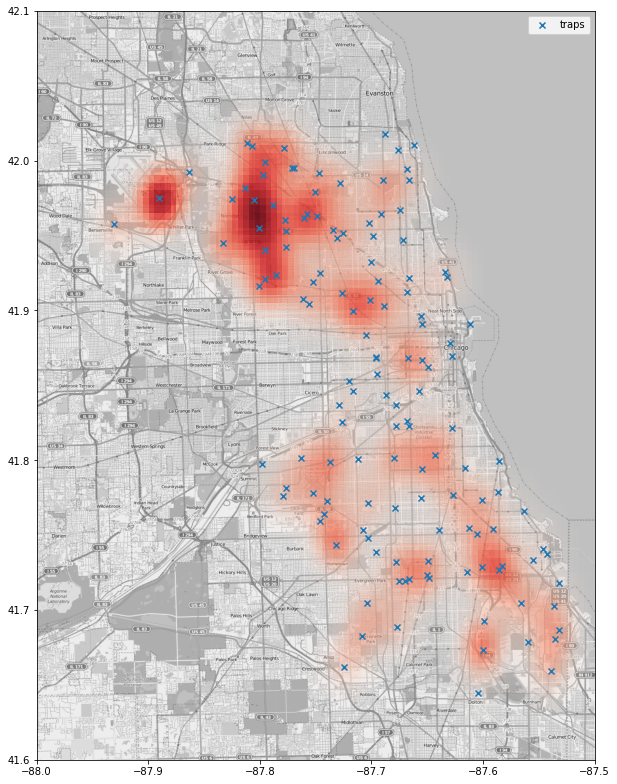

In [12]:
mapdata = np.loadtxt(
    "../input_data/mapdata_copyright_openstreetmap_contributors.txt"
)
traps = pd.read_csv("../input_data/train.csv")[
    ["Date", "Trap", "Longitude", "Latitude", "WnvPresent"]
]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3, -1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps["WnvPresent"] > 0]
sigthings = (
    sigthings.groupby(["Date", "Trap", "Longitude", "Latitude"])
    .max()["WnvPresent"]
    .reset_index()
)
X = sigthings[["Longitude", "Latitude"]].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv, yv = np.meshgrid(
    np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100)
)
gridpoints = np.array([xv.ravel(), yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100, 100))
plt.figure(figsize=(10, 14))
plt.imshow(
    mapdata, cmap=plt.get_cmap("gray"), extent=lon_lat_box, aspect=aspect
)
plt.imshow(
    zv, origin="lower", cmap=alpha_cm, extent=lon_lat_box, aspect=aspect
)

locations = traps[["Longitude", "Latitude"]].drop_duplicates().values


plt.scatter(locations[:, 0], locations[:, 1], marker="x", label='Traps')
plt.legend()
plt.show()

# Annual Cost Projection 

### Pesticides used - Adulticides & Larvicides 

A few factors to consider in this analysis include the type of pesticides used (larvicides vs adulticides), volume of spray needed, and frequency of spraying.

While this website details the costs of larvicides vs adulticides for North Dakota, <sup>[1](http://www.gfmosquito.com/wp-content/uploads/2013/06/2013-North-Dakota-Bid-Tabulation.pdf)</sup> we expect the price ranges to be similar for Chicago.

In general, larvicides are 3-22x more expensive than adulticides, with Altosid Liquid Larvicide Concentrate SR-20 2X2.5 being the most expensive ($4470/gallon).

Data about the efficacy of adulticides vs larvicides were unable to be found. If minimizing cost is the priority of CDC, adulticides ($170-220/gallon) are preferred. If minimizing transmission is the priority, a combined approach of adulticides & larvicides gives the best value for money.

### Species, Life Cycle, and Drone usage

Among the 2 most abundant species, Culex restuans  is more likely to transmit WNV, although Culex Pipiens is more likely to get infected<sup>[2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2929059/)</sup>. The government should prioritize spraying neighborhoods with a higher incidence of Culex restuans, followed by Culex Pipiens. If possible, drone technology can be used to spray mosquitoes, because they complete the same task for 10-15% of the price of a helicopter.<sup>[3](https://energycentral.com/c/pip/drone-vs-helicopters-%E2%80%93-utility-inspections).</sup>

CDC has also shown that Culex mosquitoes have a life cycle of approximately 7-10 days (from larvae to adulthood)<sup>[4](https://www.cdc.gov/westnile/resources/pdfs/FS_MosquitoLifeCycle-508.pdf)</sup>. There is also a two weeks lag between mosquito growth and virus transmission (EDA). As a result, the spraying cycle can be aligned with the mosquito growth cycle in order to maximize results - consult the relevant experts for more details on how to implement this strategy.

### Weather Features & Climate Change

Monte Carlo simulation or other simulation strategies can be used to model the effect of climate change on Culex mosquito growth and WNV transmission. Moving forward, summer temperatures are expected to increase because of global warming, and more extreme weather conditions are expected (eg. extreme changes between daily precipitation rate). According to NCBI, these meterological factors are more favourable for mosquito growth rate <sup>[5]("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/")</sup>. CDC should take these factors into account when crafting a strategy in order to best tackle this virus, and account for the cost increase per year in controlling mosquito populations in their budget.

# Benefits

As of 2014, the WNV virus has cost America almost $800 million in terms of healthcare and economic costs; this value is expected to be sharply higher by now (2022).<sup>[6](https://www.sciencedaily.com/releases/2014/02/140210184713.htm)</sup>


Hospital cost per patient with the following complications from WNV:
1. Acute flaccid paralysis: (median USD 25,117; range USD 5,385– USD283,381)
2. Encephalitis (median USD20,105; range USD3,965–USD324,167).
3. Meningitis (median USD10,556; range USD0–USD260,748). <sup>[7](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/)</sup>

### Neighborhood Location 

According to our EDA analysis, it has been discovered that more spraying has been conducted in wealthier neighborhoods as opposed to less privileged neighborhoods. Because less privileged individuals are less able to afford the exorbitant costs of insurance and American healthcare, it would be more prudent to spray these neighborhoods.

Neighborhood age should also be taken into account because older individuals (ages 60-89) have a thinner blood brain barrier and are more likely to get more severe neurological effects from the West Nile Virus<sup>[4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320478/)</sup>.

## Working with Experts in a Multi-Disciplinary Team

In addition to biostatisticians and epidemologists, these data can be presented to scientists specializing in mosquito biology and infectious diseases, as these scientists will have a greater mastery of this subject matter and more expertise in feature selection and feature engineering. For example, they can utilize their in-depth expertise of mosquito lifecycle, habitats and breeding habits to generate a model with an edge in predicting WNV transmission.

Further collaborations with medical doctors, particularly infectious diseases specialists and internists, can also help them more rapidly identify and treat WNV cases before the individual progresses to a more severe stage of the disease, especially in neighborhoods with a high infection rate. This will definitely increase the odds of patient recovery and decrease their medical bills.

# Conclusions

Based on the ....